In [2]:
import numpy as np
import pandas as pd
import tsfresh

# 准备数据

In [3]:
df = pd.read_csv('kpi.BS-006.unresp_count_total.csv')
df.head()

,timestamp,value
0,1526006040,0
1,1526006100,0
2,1526006160,0
3,1526006220,0
4,1526006280,0


- 将 unix 10 时间戳 转化为 日期
- 注意时区 北京时间 +8 hours

In [4]:
from datetime import datetime, timedelta

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True) + timedelta(hours=8)

In [6]:
df.head()

,timestamp,value
0,2018-05-11 10:34:00+00:00,0
1,2018-05-11 10:35:00+00:00,0
2,2018-05-11 10:36:00+00:00,0
3,2018-05-11 10:37:00+00:00,0
4,2018-05-11 10:38:00+00:00,0


- 添加 column_id 列

In [7]:
df['id'] = '1'

In [8]:
df.head()

,timestamp,value,id
0,2018-05-11 10:34:00+00:00,0,1
1,2018-05-11 10:35:00+00:00,0,1
2,2018-05-11 10:36:00+00:00,0,1
3,2018-05-11 10:37:00+00:00,0,1
4,2018-05-11 10:38:00+00:00,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115571 entries, 0 to 115570
Data columns (total 3 columns):
timestamp    115571 non-null datetime64[ns, UTC]
value        115571 non-null int64
id           115571 non-null object
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 2.6+ MB


# 可视化

In [10]:
df_visual = df.set_index('timestamp')

In [17]:
df_visual = df_visual.drop(['id'], axis=1)

In [18]:
df_visual.head()

,value
timestamp,
2018-05-11 10:34:00+00:00,0
2018-05-11 10:35:00+00:00,0
2018-05-11 10:36:00+00:00,0
2018-05-11 10:37:00+00:00,0
2018-05-11 10:38:00+00:00,0


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


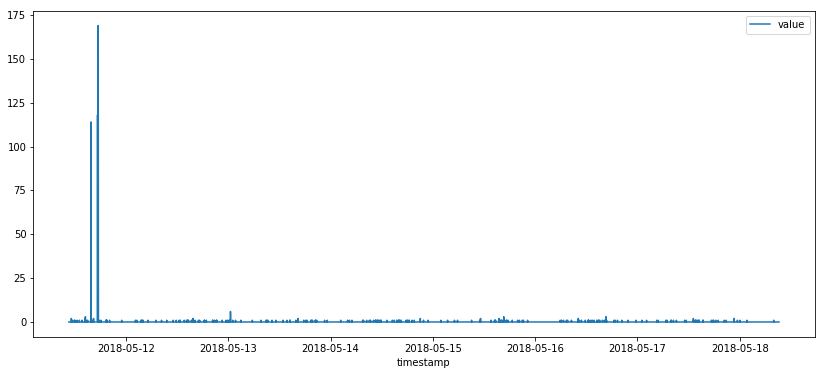

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

sns.lineplot(data=df_visual[:10000])

# extract

In [22]:
# default_fc_parameters

from tsfresh import extract_features

In [24]:
from tsfresh.feature_extraction import MinimalFCParameters
settings = MinimalFCParameters()
extract_features(df, default_fc_parameters=settings, column_id='id', column_sort='timestamp', column_value='value')

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 27.97it/s]


variable,value__length,value__maximum,value__mean,value__median,value__minimum,value__standard_deviation,value__sum_values,value__variance
id,,,,,,,,
1,115571.0,325.0,0.121216,0.0,0.0,4.90658,14009.0,24.074525


- 问题1: 用 comprehensiveFCParameters 来提取特征 耗时很长
- 问题2: 数据没有 标签y, 提取特征后无法选择特征